In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

### Data Set Implement

In [2]:
titanic_df = pd.read_csv('train.csv')

### Getting an Idea of the Data Set

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle Null Values

#### Age Column

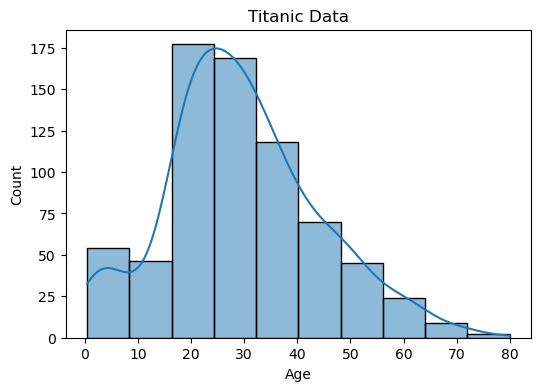

In [8]:
fig, axes = plt.subplots(figsize=(6, 4))  

# Plot a histogram of the 'Age' column from the 'titanic_df' DataFrame
sns.histplot(titanic_df['Age'], kde=True, bins=10)
plt.title('Titanic Data') 

plt.show()

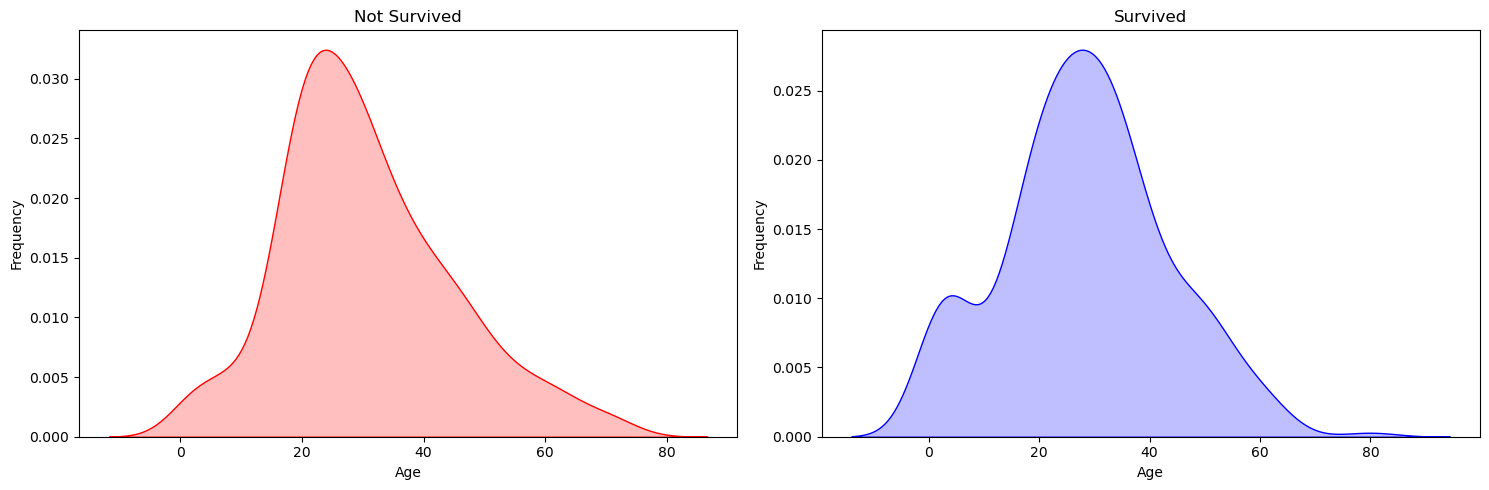

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot a kernel density estimate (KDE) of the 'Age' column from the 'titanic_df' DataFrame 
sns.kdeplot(titanic_df['Age'][(titanic_df['Survived']==0) & (titanic_df['Age'].notnull())], color='Red', fill=True, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Not Survived')

# Plot a kernel density estimate (KDE) of the 'Age' column from the 'titanic_df' DataFrame 
sns.kdeplot(titanic_df['Age'][(titanic_df['Survived']==1) & (titanic_df['Age'].notnull())], color='Blue', fill=True, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Survived')

plt.tight_layout()
plt.show()

In [10]:
titanic_df_1 = titanic_df.copy()  

# Fill missing values in the 'Age' column with the mean age of all passengers
titanic_df_1['Age'].fillna(titanic_df_1['Age'].mean(), inplace=True)

In [11]:
titanic_df_1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Embarked

In [12]:
titanic_df_2 = titanic_df_1.copy()

# Fill missing values in the 'Embarked' column with the mode of the column
titanic_df_2['Embarked'].fillna(titanic_df_2['Embarked'].mode()[0], inplace=True)

In [13]:
titanic_df_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Create/Drop Columns

In [14]:
titanic_df_2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### PassengerId Column

In [15]:
titanic_df_3 = titanic_df_2.copy() 

# Drop the 'PassengerId' column from the DataFrame 'titanic_df_3'
titanic_df_3 = titanic_df_3.drop(columns = 'PassengerId',axis=1)

#### Pclass Column

In [16]:
titanic_df_3['Survived'] = titanic_df_3['Survived'].astype(int)

# Group DataFrame by 'Pclass' and calculate mean survival rate for each class
titanic_df_3.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


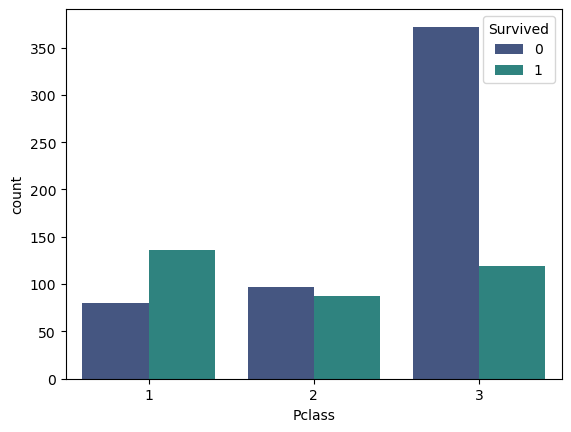

In [17]:
custom_palette = sns.color_palette("viridis", 3) 
titanic_df_3['Survived'] = titanic_df_3['Survived'].astype(str)
sns.countplot(x='Pclass', hue='Survived', data=titanic_df_3, palette=custom_palette)
titanic_df_3['Survived'] = titanic_df_3['Survived'].astype(int)

#### Name Column

In [18]:
titanic_df_3['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [19]:
titanic_df_4 = titanic_df_3.copy()

# Split the 'Name' column by comma
name_split = titanic_df_4['Name'].str.split(pat=',', expand=True)

# Extract the second column which contains titles
title_from_comma = name_split[1]

# Split the titles by period ('.') and expand into separate columns
title_split = title_from_comma.str.split(pat='.', expand=True)

# Extract the first column which contains the titles
title_column = title_split[0]

# Apply a lambda function to strip leading and trailing whitespaces from each title
stripped_titles = title_column.apply(lambda x: x.strip())

# Assign the stripped titles to a new 'Title' column in the DataFrame
titanic_df_4['Title'] = stripped_titles


In [20]:
# Group DataFrame by 'Title' and calculate mean survival rate for each title
titanic_df_4.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [21]:
titanic_df_4['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [22]:
# Map titles to corresponding categories:

#military - Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmaried Female - Mlle, Ms, Mme

# Replace titles with corresponding categories
titanic_df_5 = titanic_df_4.copy()
titanic_df_5['Title'] = titanic_df_5['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [23]:
titanic_df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 80.2+ KB


In [24]:
# Group DataFrame by 'Title' and calculate both the count and mean survival rate for each title
titanic_df_5.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [25]:
titanic_df_6 = titanic_df_5.copy()

# Drop the 'Name' column
titanic_df_6 = titanic_df_6.drop(columns = 'Name',axis=1)

In [26]:
titanic_df_6.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


#### Sex Column

In [27]:
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(int)

# Group the DataFrame by the 'Sex' column and calculate the mean survival rate for gender
titanic_df_6.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


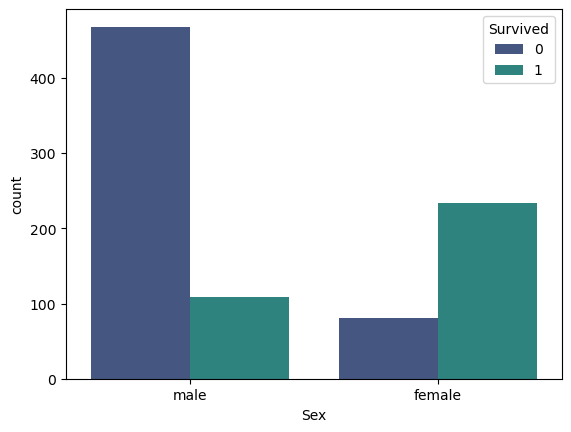

In [28]:
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(str)
custom_palette = sns.color_palette("viridis", 3) 
sns.countplot(x='Sex', hue='Survived', data=titanic_df_6, palette=custom_palette)
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(int)

#### Age Column

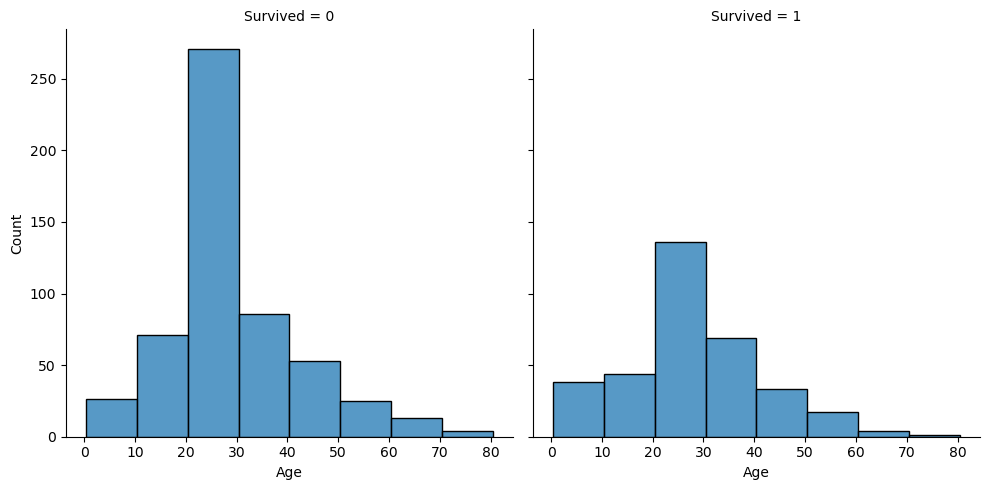

In [29]:
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(str)
sns.displot(titanic_df_6, x='Age', col='Survived', binwidth=10, height=5)
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(int)

#### SibSp & Parch Columns

In [30]:
# Group the DataFrame by the 'SibSp' column and calculate the mean survival rate for each unique value
titanic_df_6.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


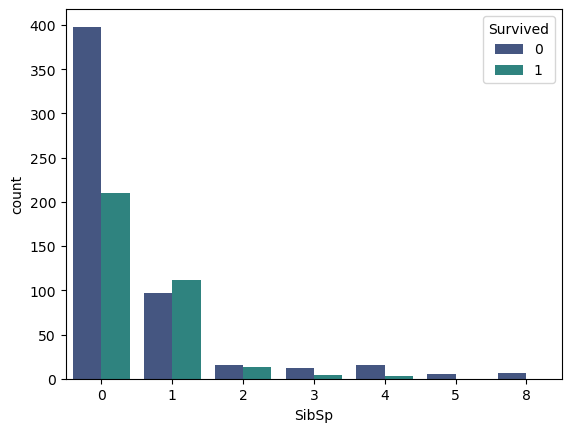

In [31]:
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(str)
custom_palette = sns.color_palette("viridis", 3) 
sns.countplot(x='SibSp', hue='Survived', data=titanic_df_6, palette=custom_palette)
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(int)

In [32]:
# Group the DataFrame by the 'Parch' column and calculate the mean survival rate for each unique value
titanic_df_6.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


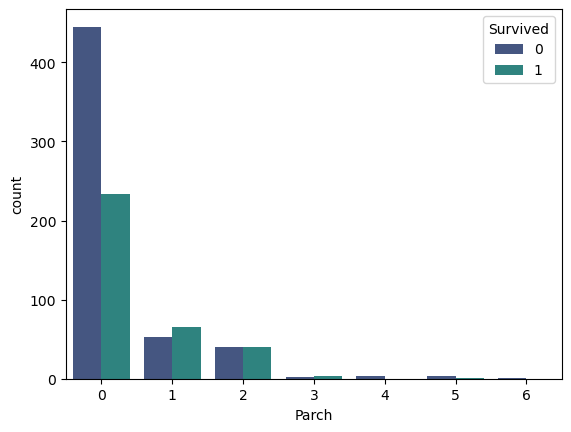

In [33]:
titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(str)

custom_palette = sns.color_palette("viridis", 3) 
sns.countplot(x='Parch', hue='Survived', data=titanic_df_6, palette=custom_palette)

titanic_df_6['Survived'] = titanic_df_6['Survived'].astype(int)

In [34]:
titanic_df_7 = titanic_df_6.copy()

# create family size column using SibSp column and Parch column
titanic_df_7['Family_Size'] = titanic_df_7['SibSp'] + titanic_df_7['Parch'] + 1

In [35]:
# Calculate the mean survival rate for passengers grouped by their family size
titanic_df_7.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


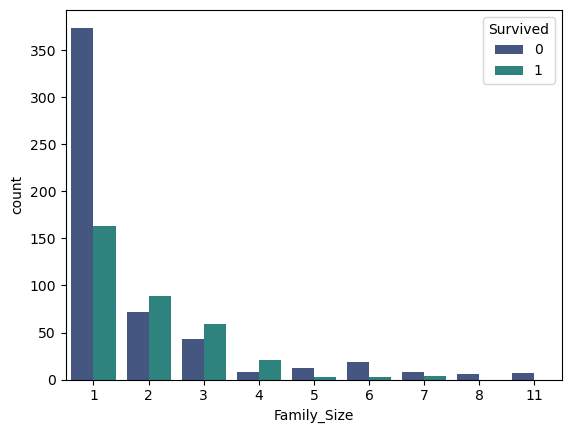

In [36]:
titanic_df_7['Survived'] = titanic_df_7['Survived'].astype(str)

custom_palette = sns.color_palette("viridis", 3) 
sns.countplot(x='Family_Size', hue='Survived', data=titanic_df_7, palette=custom_palette)


titanic_df_7['Survived'] = titanic_df_7['Survived'].astype(int)

In [37]:
titanic_df_7.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [38]:
titanic_df_8 = titanic_df_7.copy()

# drop SibSp, Parch columns
# titanic_df_8 = titanic_df_8.drop(columns = ['SibSp', 'Parch' ],axis=1)

In [39]:
titanic_df_8.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


#### Ticket Colimn

In [40]:
titanic_df_9 = titanic_df_8.copy()

# drop Ticket columns
titanic_df_9 = titanic_df_9.drop(columns = 'Ticket',axis=1)

In [41]:
titanic_df_9.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,1


#### Fare Column 

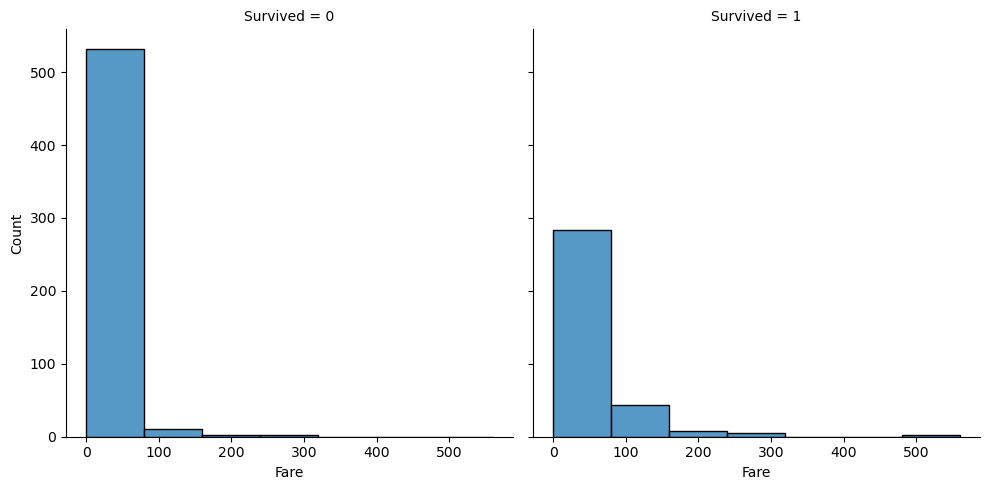

In [42]:
titanic_df_9['Survived'] = titanic_df_9['Survived'].astype(str)
sns.displot(titanic_df_9, x='Fare', col='Survived', binwidth=80, height=5)
titanic_df_9['Survived'] = titanic_df_9['Survived'].astype(int)

In [43]:
titanic_df_9.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,2


#### Cabin Column

In [44]:
titanic_df_10 = titanic_df_9.copy()

# drop Cabin columns
titanic_df_10 = titanic_df_10.drop(columns = 'Cabin',axis=1)

In [45]:
titanic_df_10.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2


#### Embarked Column

In [46]:
# Calculate the mean survival rate for passengers grouped by their port of embarkation
titanic_df_10.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


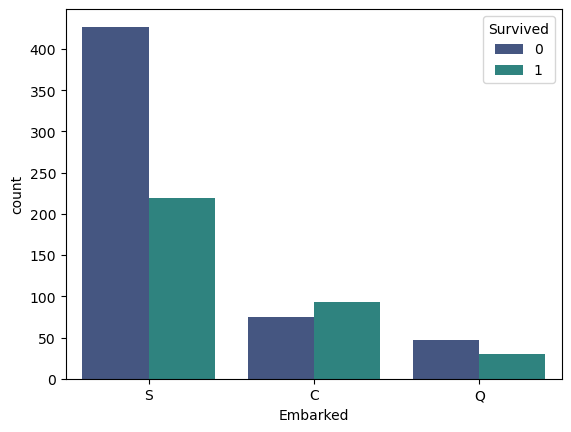

In [47]:
titanic_df_10['Survived'] = titanic_df_10['Survived'].astype(str)

custom_palette = sns.color_palette("viridis", 3) 
sns.countplot(x='Embarked', hue='Survived', data=titanic_df_10, palette=custom_palette)


titanic_df_10['Survived'] = titanic_df_10['Survived'].astype(int)

### Outlier Detection using Z-Score

In [48]:
titanic_df_10.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2


In [49]:
titanic_df_10.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


#### Age Column

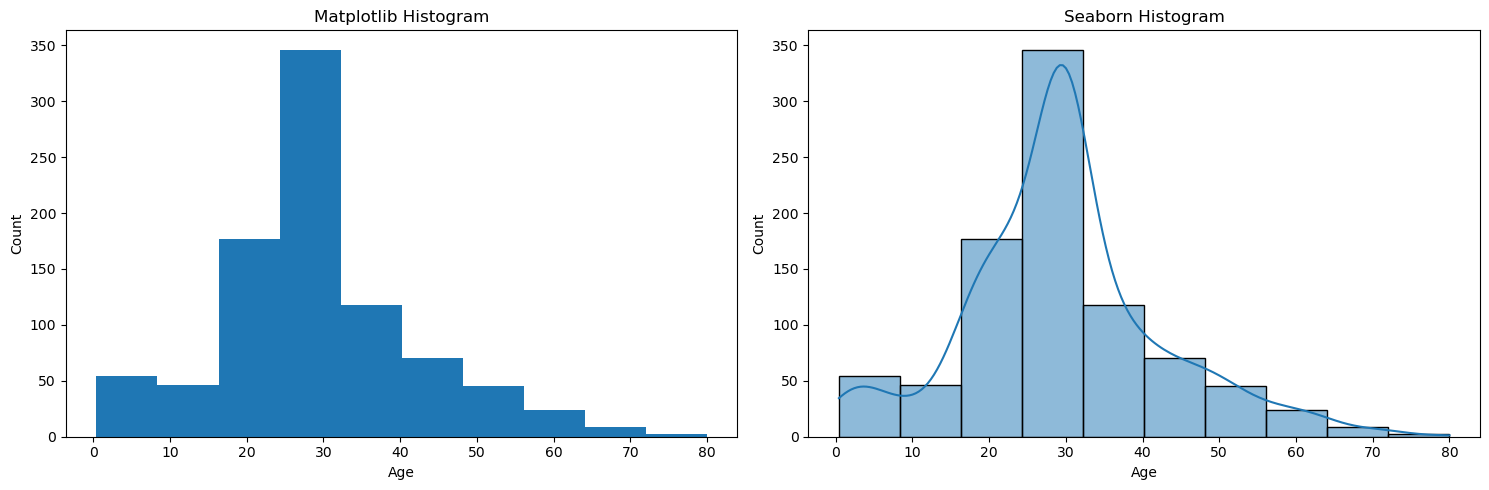

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(titanic_df_10['Age'])
axes[0].set_title('Matplotlib Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(titanic_df_10['Age'], kde=True, bins=10, ax=axes[1])
axes[1].set_title('Seaborn Histogram')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [51]:
titanic_df_10.shape

(891, 10)

In [52]:
age_mean = np.mean(titanic_df_10['Age'])
age_mean

29.69911764705882

In [53]:
age_std = np.std(titanic_df_10['Age'])
age_std

12.994716872789033

In [54]:
titanic_df_11 = titanic_df_10.copy()
titanic_df_11['Age_z_score'] = (titanic_df_11['Age'] - age_mean)/age_std
titanic_df_11.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Age_z_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,-0.592481
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0.638789
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,-0.284663
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0.407926
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,0.407926


In [55]:
titanic_df_11['Age_z_score'].min()

-2.2531554887793948

In [56]:
titanic_df_11['Age_z_score'].max()

3.8708717431367314

In [57]:
titanic_df_11[titanic_df_11['Age_z_score']>3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Age_z_score
96,0,1,male,71.0,0,0,34.6542,C,Mr,1,3.178283
116,0,3,male,70.5,0,0,7.7500,Q,Mr,1,3.139805
493,0,1,male,71.0,0,0,49.5042,C,Mr,1,3.178283
630,1,1,male,80.0,0,0,30.0000,S,Mr,1,3.870872
672,0,2,male,70.0,0,0,10.5000,S,Mr,1,3.101328
745,0,1,male,70.0,1,1,71.0000,S,Military,3,3.101328
851,0,3,male,74.0,0,0,7.7750,S,Mr,1,3.409146


In [58]:
age_outlier_indexes = []
age_outlier_indexes.extend(titanic_df_11.index[titanic_df_11['Age_z_score']>3].tolist())
age_outlier_indexes

[96, 116, 493, 630, 672, 745, 851]

In [59]:
titanic_df_11_new = titanic_df_11.drop(titanic_df_11.index[age_outlier_indexes])
titanic_df_11_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Age_z_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,-0.592481
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0.638789
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,-0.284663
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0.407926
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,0.407926


In [60]:
titanic_df_11.shape[0], titanic_df_11_new.shape[0]

(891, 884)

In [61]:
titanic_df_12 = titanic_df_11_new.drop('Age_z_score', axis=1)

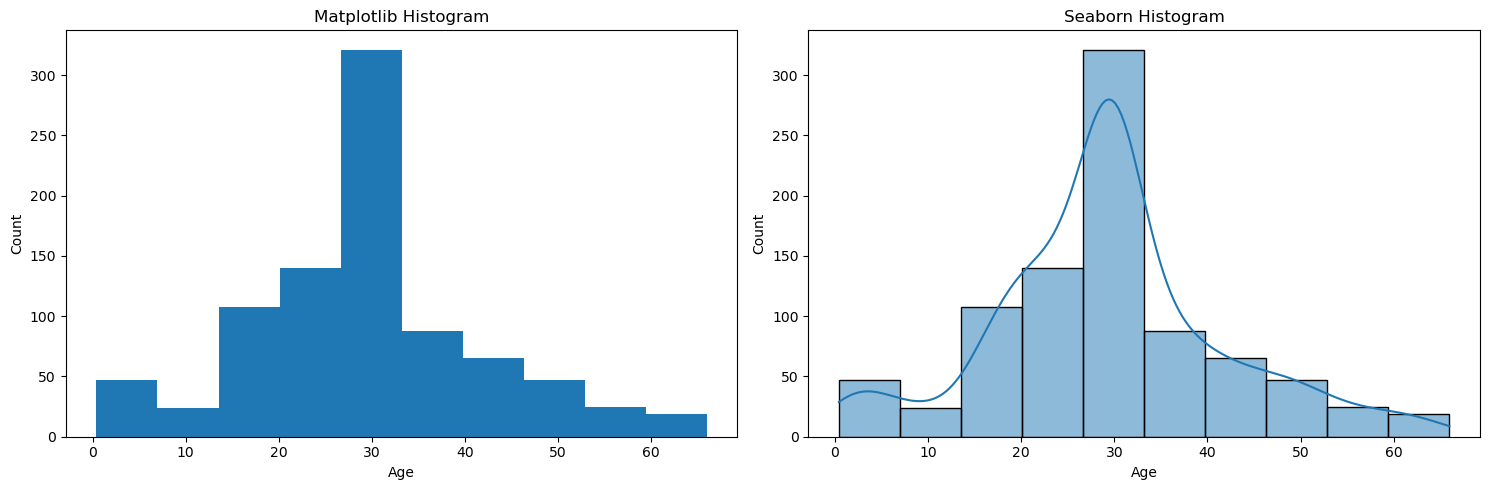

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(titanic_df_12['Age'])
axes[0].set_title('Matplotlib Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(titanic_df_12['Age'], kde=True, bins=10, ax=axes[1])
axes[1].set_title('Seaborn Histogram')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Fare Column

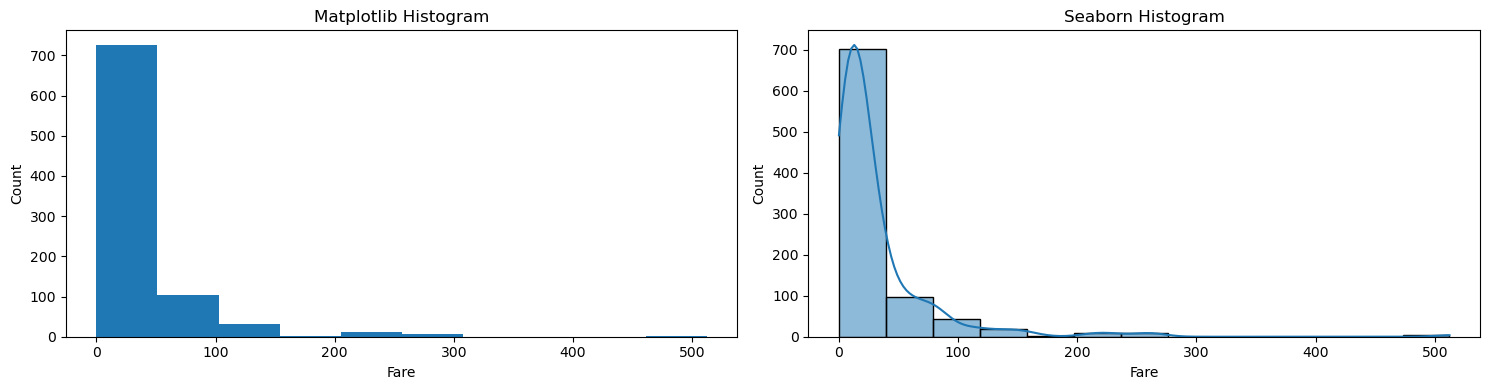

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].hist(titanic_df_12['Fare'])
axes[0].set_title('Matplotlib Histogram')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

sns.histplot(titanic_df_12['Fare'], kde=True, bins=13, ax=axes[1])
axes[1].set_title('Seaborn Histogram')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [64]:
titanic_df_12.shape

(884, 10)

In [65]:
fare_mean = np.mean(titanic_df_12['Fare'])
fare_mean

32.22032341628959

In [66]:
fare_std = np.std(titanic_df_12['Fare'])
fare_std

49.82227953671734

In [67]:
titanic_df_13 = titanic_df_12.copy()
titanic_df_13['Fare_z_score'] = (titanic_df_13['Fare'] - fare_mean)/fare_std
titanic_df_13.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Fare_z_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,-0.501188
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0.784046
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,-0.487640
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0.419083
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,-0.485131


In [68]:
titanic_df_13['Fare_z_score'].min()

-0.6467051230071538

In [69]:
titanic_df_13['Fare_z_score'].max()

9.636429345427407

In [70]:
titanic_df_13[titanic_df_13['Fare_z_score']>3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Fare_z_score
27,0,1,male,19.000000,3,2,263.0000,S,Mr,6,4.632058
88,1,1,female,23.000000,3,2,263.0000,S,Miss,6,4.632058
118,0,1,male,24.000000,0,1,247.5208,C,Mr,2,4.321369
258,1,1,female,35.000000,0,0,512.3292,C,Miss,1,9.636429
299,1,1,female,50.000000,0,1,247.5208,C,Mrs,2,4.321369
311,1,1,female,18.000000,2,2,262.3750,C,Miss,5,4.619513
341,1,1,female,24.000000,3,2,263.0000,S,Miss,6,4.632058
377,0,1,male,27.000000,0,2,211.5000,C,Mr,3,3.598384
380,1,1,female,42.000000,0,0,227.5250,C,Miss,1,3.920027
438,0,1,male,64.000000,1,4,263.0000,S,Mr,6,4.632058


In [71]:
fare_outlier_indexes = []
fare_outlier_indexes.extend(titanic_df_13.index[titanic_df_13['Fare_z_score']>3].tolist())
fare_outlier_indexes

[27,
 88,
 118,
 258,
 299,
 311,
 341,
 377,
 380,
 438,
 527,
 557,
 679,
 689,
 700,
 716,
 730,
 737,
 742,
 779]

In [72]:
titanic_df_13_new = titanic_df_13.drop(titanic_df_13.index[fare_outlier_indexes])
titanic_df_13_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Fare_z_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,-0.501188
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0.784046
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,-0.487640
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0.419083
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,-0.485131


In [73]:
titanic_df_13.shape[0], titanic_df_13_new.shape[0]

(884, 864)

In [74]:
titanic_df_14 = titanic_df_13_new.drop('Fare_z_score', axis=1)

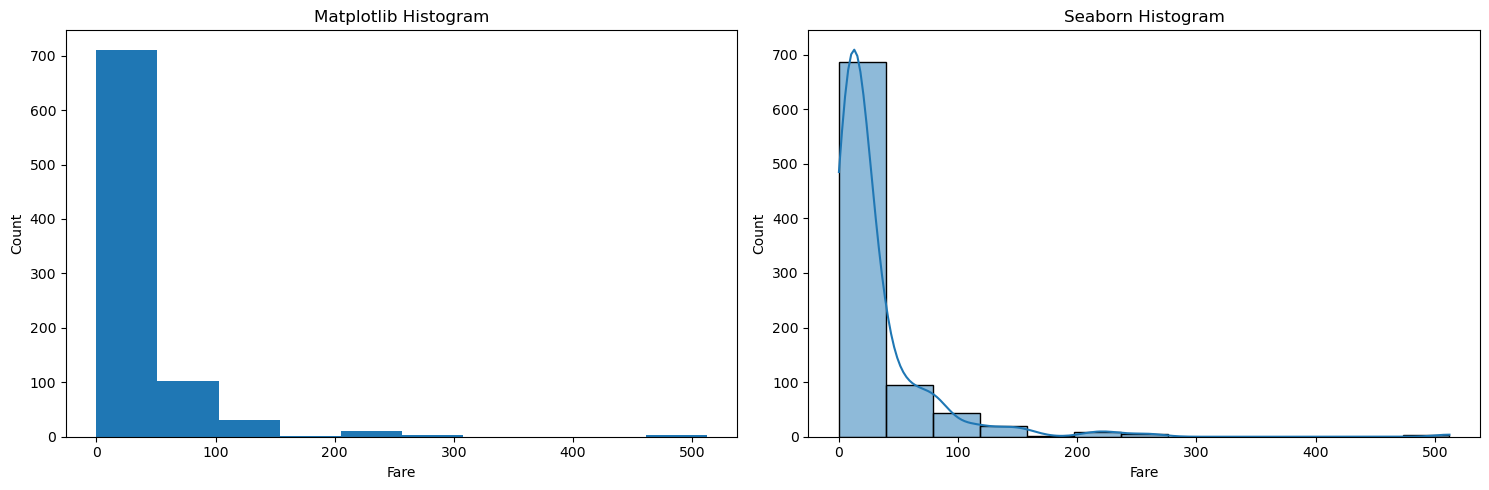

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(titanic_df_14['Fare'])
axes[0].set_title('Matplotlib Histogram')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

sns.histplot(titanic_df_14['Fare'],  kde=True, bins=13, ax=axes[1])
axes[1].set_title('Seaborn Histogram')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Family_Size

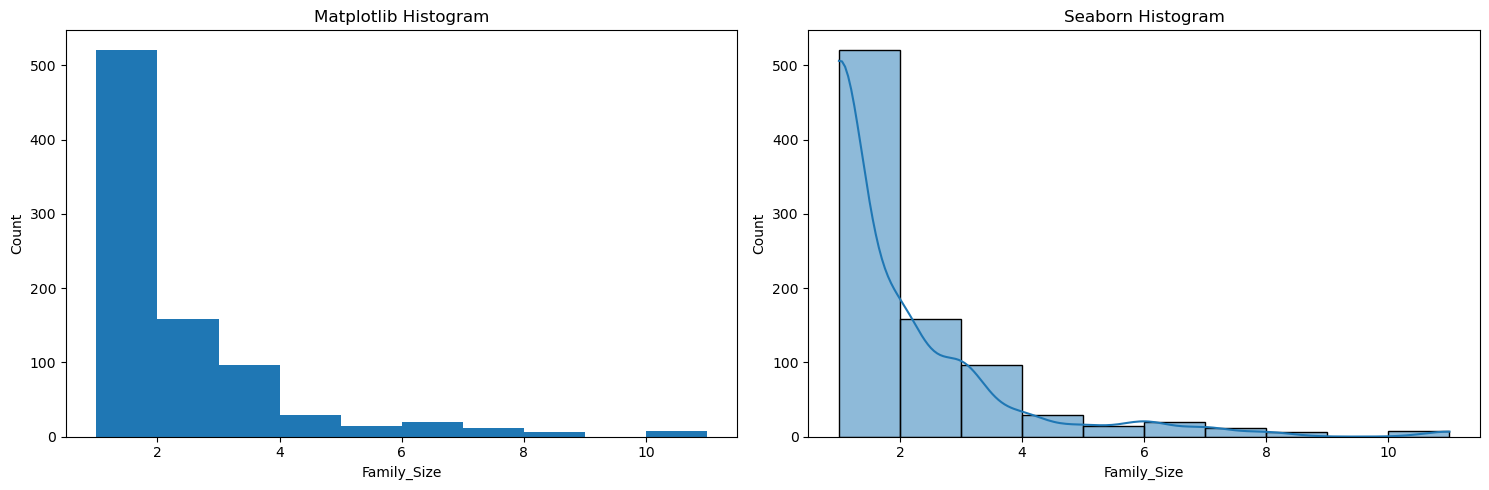

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(titanic_df_14['Family_Size'])
axes[0].set_title('Matplotlib Histogram')
axes[0].set_xlabel('Family_Size')
axes[0].set_ylabel('Count')

sns.histplot(titanic_df_14['Family_Size'], kde=True, bins=10, ax=axes[1])
axes[1].set_title('Seaborn Histogram')
axes[1].set_xlabel('Family_Size')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [77]:
titanic_df_14.shape

(864, 10)

In [78]:
family_size_mean = np.mean(titanic_df_14['Family_Size'])
family_size_mean

1.900462962962963

In [79]:
family_size_std = np.std(titanic_df_14['Family_Size'])
family_size_std

1.6149761403232552

In [80]:
titanic_df_15 = titanic_df_14.copy()
titanic_df_15['Family_Size_z_score'] = (titanic_df_15['Family_Size'] - family_size_mean)/family_size_std
titanic_df_15.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Family_Size_z_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,0.061634
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0.061634
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,-0.557570
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0.061634
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,-0.557570


In [81]:
titanic_df_15['Family_Size_z_score'].min()

-0.5575704435996964

In [82]:
titanic_df_15['Family_Size_z_score'].max()

5.634471500746546

In [83]:
titanic_df_15[titanic_df_15['Family_Size_z_score']>2.8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Family_Size_z_score
13,0,3,male,39.000000,1,5,31.2750,S,Mr,7,3.157655
25,1,3,female,38.000000,1,5,31.3875,S,Mrs,7,3.157655
59,0,3,male,11.000000,5,2,46.9000,S,Master,8,3.776859
68,1,3,female,17.000000,4,2,7.9250,S,Miss,7,3.157655
71,0,3,female,16.000000,5,2,46.9000,S,Miss,8,3.776859
119,0,3,female,2.000000,4,2,31.2750,S,Miss,7,3.157655
159,0,3,male,29.699118,8,2,69.5500,S,Master,11,5.634472
180,0,3,female,29.699118,8,2,69.5500,S,Miss,11,5.634472
182,0,3,male,9.000000,4,2,31.3875,S,Master,7,3.157655
201,0,3,male,29.699118,8,2,69.5500,S,Mr,11,5.634472


In [84]:
family_size_outlier_indexes = []
family_size_outlier_indexes.extend(titanic_df_15.index[titanic_df_15['Family_Size_z_score']>2.8].tolist())
family_size_outlier_indexes

[13,
 25,
 59,
 68,
 71,
 119,
 159,
 180,
 182,
 201,
 233,
 261,
 324,
 386,
 480,
 541,
 542,
 610,
 678,
 683,
 792,
 813,
 846,
 850,
 863]

In [85]:
titanic_df_15_new = titanic_df_15.drop(titanic_df_15.index[family_size_outlier_indexes])
titanic_df_15_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,Family_Size_z_score
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,0.061634
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0.061634
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,-0.557570
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0.061634
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,-0.557570


In [86]:
titanic_df_15.shape[0], titanic_df_15_new.shape[0]

(864, 839)

In [87]:
titanic_df_16 = titanic_df_15_new.drop('Family_Size_z_score', axis=1)

In [88]:
titanic_df_16.shape[0]

839

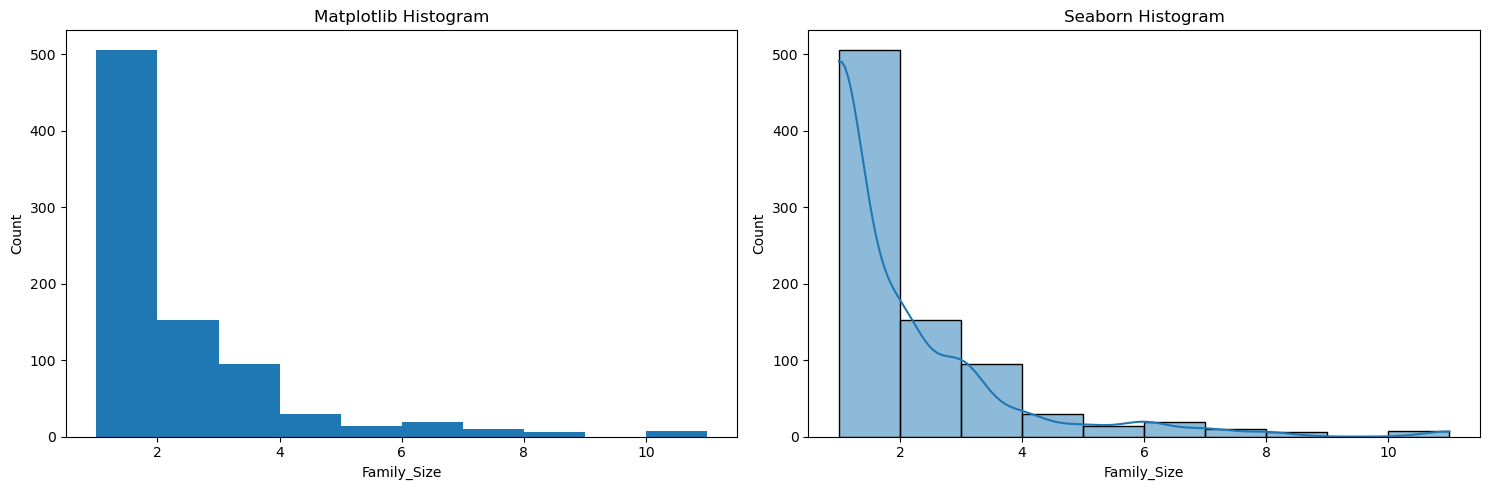

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(titanic_df_16['Family_Size'])
axes[0].set_title('Matplotlib Histogram')
axes[0].set_xlabel('Family_Size')
axes[0].set_ylabel('Count')

sns.histplot(titanic_df_16['Family_Size'], kde=True, bins=10, ax=axes[1])
axes[1].set_title('Seaborn Histogram')
axes[1].set_xlabel('Family_Size')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [90]:
titanic_df_16.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
885,0,3,female,39.000000,0,5,29.125,Q,Mrs,6
886,0,2,male,27.000000,0,0,13.000,S,Rev,1
887,1,1,female,19.000000,0,0,30.000,S,Miss,1
888,0,3,female,29.699118,1,2,23.450,S,Miss,4
889,1,1,male,26.000000,0,0,30.000,C,Mr,1


In [91]:
titanic_df_16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     839 non-null    int32  
 1   Pclass       839 non-null    int64  
 2   Sex          839 non-null    object 
 3   Age          839 non-null    float64
 4   SibSp        839 non-null    int64  
 5   Parch        839 non-null    int64  
 6   Fare         839 non-null    float64
 7   Embarked     839 non-null    object 
 8   Title        839 non-null    object 
 9   Family_Size  839 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 68.8+ KB


### Feature Scaling - Normalization

In [92]:
titanic_df_17 =titanic_df_16.copy()

scaler = MinMaxScaler(feature_range=(0, 10))

numeric_columns = ['Age', 'Fare']

for column in numeric_columns:
    column_data = titanic_df_17[column].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(column_data)
    titanic_df_17[column] = scaled_data

print(titanic_df_17.info())

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     839 non-null    int32  
 1   Pclass       839 non-null    int64  
 2   Sex          839 non-null    object 
 3   Age          839 non-null    float64
 4   SibSp        839 non-null    int64  
 5   Parch        839 non-null    int64  
 6   Fare         839 non-null    float64
 7   Embarked     839 non-null    object 
 8   Title        839 non-null    object 
 9   Family_Size  839 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 68.8+ KB
None


In [93]:
titanic_df_17.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.393325,2.320620,4.389245,0.520858,0.376639,0.617599,1.897497
std,0.488779,0.831045,1.881587,1.112623,0.786963,0.954140,1.609631
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,3.290637,0.000000,0.000000,0.154686,1.000000
50%,0.000000,3.000000,4.464641,0.000000,0.000000,0.281069,1.000000
75%,1.000000,3.000000,5.272949,1.000000,0.000000,0.595320,2.000000
max,1.000000,3.000000,10.000000,8.000000,6.000000,10.000000,11.000000


In [94]:
titanic_df_17.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,0,3,male,3.290637,1,0,0.141511,S,Mr,2
1,1,1,female,5.730406,1,0,1.391357,C,Mrs,2
2,1,3,female,3.900579,0,0,0.154686,S,Miss,1


### Data Encoding - One Hot Encoding

In [95]:
titanic_df_17.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,0,3,male,3.290637,1,0,0.141511,S,Mr,2
1,1,1,female,5.730406,1,0,1.391357,C,Mrs,2
2,1,3,female,3.900579,0,0,0.154686,S,Miss,1
3,1,1,female,5.272949,1,0,1.036443,S,Mrs,2
4,0,3,male,5.272949,0,0,0.157126,S,Mr,1


In [96]:
titanic_df_18 = titanic_df_17.copy()

# Select categorical columns
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Title']

# Extract categorical features
categorical_data = titanic_df_18[categorical_columns]

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical features
encoded_data = one_hot_encoder.fit_transform(categorical_data)

# Get the feature names from OneHotEncoder
feature_names = one_hot_encoder.get_feature_names_out(categorical_columns)

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=titanic_df_18.index)

# Drop original categorical columns from titanic_df_18
titanic_df_18.drop(columns=categorical_columns, inplace=True)

# Concatenate titanic_df_18 with encoded_df
titanic_df_18 = pd.concat([titanic_df_18, encoded_df], axis=1)

titanic_df_18

,Survived,Age,SibSp,Parch,Fare,Family_Size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,0,3.290637,1,0,0.141511,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,5.730406,1,0,1.391357,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3.900579,0,0,0.154686,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,5.272949,1,0,1.036443,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,5.272949,0,0,0.157126,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,5.882891,0,5,0.568482,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
886,0,4.053065,0,0,0.253743,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,2.833181,0,0,0.585561,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,0,4.464641,1,2,0.457714,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [97]:
titanic_df_19 = titanic_df_18.copy()

### Data Blancing

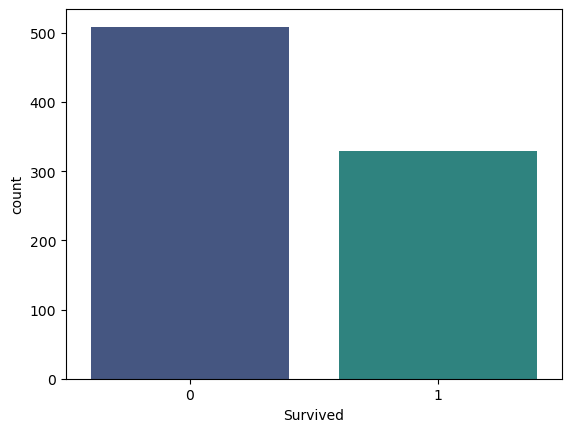

In [98]:
colors = sns.color_palette("viridis", 3)
sns.countplot(x='Survived', data=titanic_df_19, palette=colors)
plt.show()

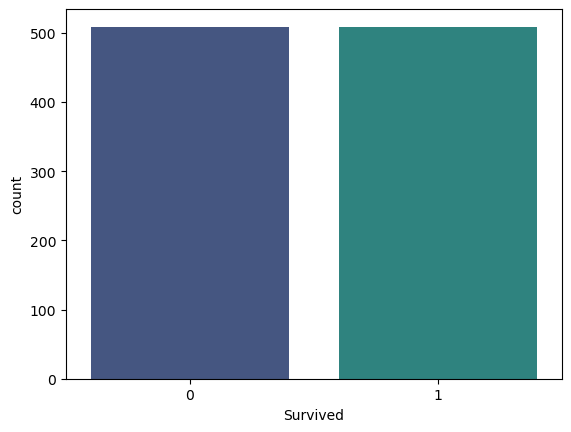

In [99]:
inbalance_X = titanic_df_19.drop(['Survived'], axis=1)
inbalance_y = titanic_df_19['Survived']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(inbalance_X, inbalance_y)

## Create a new DataFrame with balanced data
titanic_df_20 = pd.concat([pd.DataFrame(y_balanced, columns=['Survived']), pd.DataFrame(X_balanced, columns=inbalance_X.columns)], axis=1)

colors = sns.color_palette("viridis", 3)
sns.countplot(x='Survived', data=titanic_df_20, palette=colors)
plt.show()

### Feature Selection

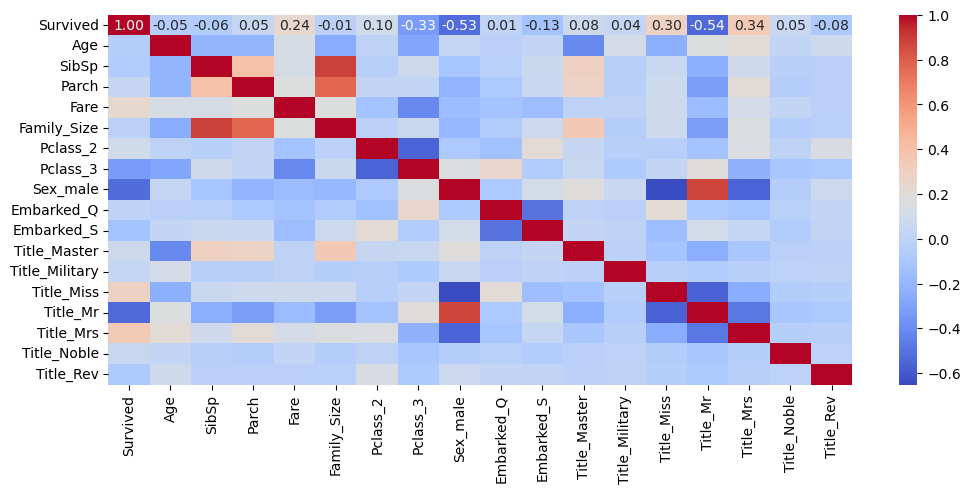

In [100]:
correlation_matrix = titanic_df_20.corr(numeric_only=True)
plt.figure(figsize=(12, 4.8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

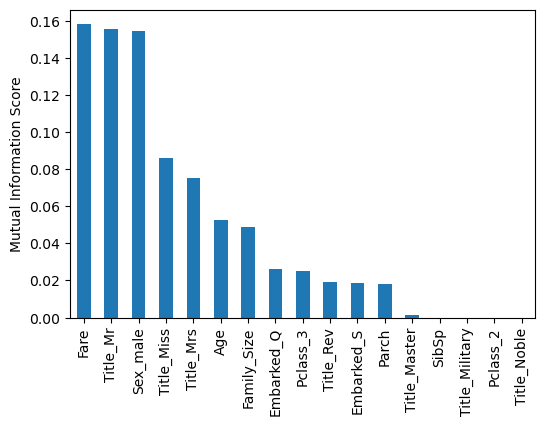

,Age,Parch,Fare,Family_Size,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,3.290637,0.0,0.141511,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.730406,0.0,1.391357,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.900579,0.0,0.154686,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5.272949,0.0,1.036443,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.272949,0.0,0.157126,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [101]:
titanic_df_21 = titanic_df_20.copy()

A = titanic_df_21.drop('Survived', axis=1)
B = titanic_df_21['Survived']

fs = SelectKBest(score_func=mutual_info_classif, k=14)
fs.fit(A, B)

mi_score = pd.Series(fs.scores_, index=A.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.ylabel('Mutual Information Score') 
plt.show()

selected_A = fs.transform(A)
selected_A = pd.DataFrame(selected_A, columns=A.columns[fs.get_support()])

selected_A.head()

In [102]:
X_titanic = selected_A 
y_titanic = B 

### Data Spliting

In [103]:
X = selected_A  
y = B  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

### Cross-Validation


In [104]:
log_reg_model = LogisticRegression()
num_splits = 2

kf = KFold(n_splits=num_splits, shuffle=True, random_state=21)

cv_scores = cross_val_score(log_reg_model, X, y, cv=kf).mean()

print("Cross-validation scores:", cv_scores)

Cross-validation scores: 0.7976424361493124


 ### Model Training

In [105]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [106]:
log_reg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Performance Evaluate

In [107]:
train_predictions = log_reg_model.predict(X_train)
test_predictions = log_reg_model.predict(X_test)

In [108]:
training_accuracy = round(accuracy_score(y_train, train_predictions), 4)
training_precision = round(precision_score(y_train, train_predictions), 4)
training_recall = round(recall_score(y_train, train_predictions), 4)
training_f1 = round(f1_score(y_train, train_predictions), 4)
training_roc_auc = round(roc_auc_score(y_train, train_predictions), 4)

testing_accuracy = round(accuracy_score(y_test, test_predictions), 4)
testing_precision = round(precision_score(y_test, test_predictions), 4)
testing_recall = round(recall_score(y_test, test_predictions), 4)
testing_f1 = round(f1_score(y_test, test_predictions), 4)
testing_roc_auc = round(roc_auc_score(y_test, test_predictions), 4)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

print("\nTraining Precision:", training_precision)
print("Testing Precision:", testing_precision)

print("\nTraining Recall:", training_recall)
print("Testing Recall:", testing_recall)

print("\nTraining F1-score:", training_f1)
print("Testing F1-score:", testing_f1)

print("\nTraining ROC AUC Score:", training_roc_auc)
print("Testing ROC AUC Score:", testing_roc_auc)

Training Accuracy: 0.8108
Testing Accuracy: 0.7843

Training Precision: 0.8391
Testing Precision: 0.8152

Training Recall: 0.769
Testing Recall: 0.7353

Training F1-score: 0.8026
Testing F1-score: 0.7732

Training ROC AUC Score: 0.8108
Testing ROC AUC Score: 0.7843


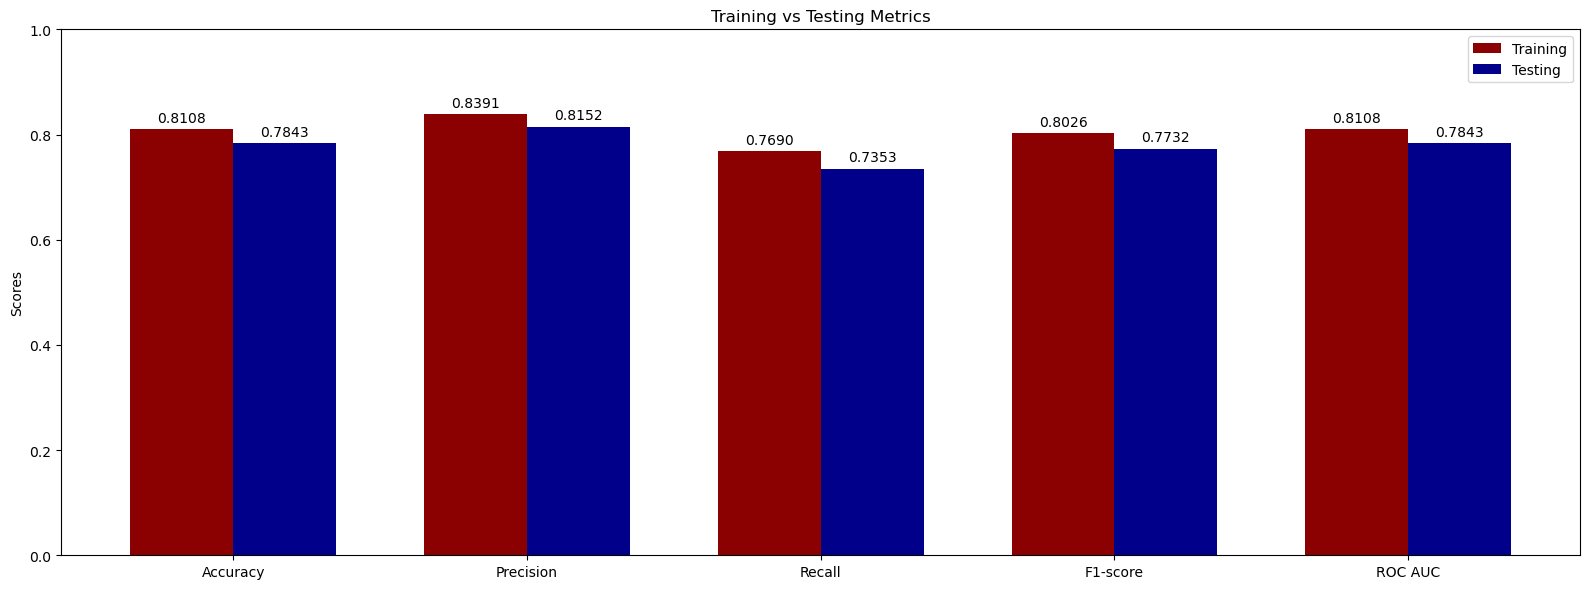

In [109]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
training_values = [training_accuracy, training_precision, training_recall, training_f1, training_roc_auc]
testing_values = [testing_accuracy, testing_precision, testing_recall, testing_f1, testing_roc_auc]

x = np.arange(len(metrics))  
width = 0.35 

fig, ax = plt.subplots(figsize=(16, 6))
rects1 = ax.bar(x - width/2, training_values, width, label='Training', color='darkred')
rects2 = ax.bar(x + width/2, testing_values, width, label='Testing', color='darkblue')

ax.set_ylim(0, 1.0)

ax.set_ylabel('Scores')
ax.set_title('Training vs Testing Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Hyperparameter Optimization

In [110]:
param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-2, 2, 5), 
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 500, 1000], 
        'l1_ratio': np.linspace(0, 1, 3),   
}

num_splits = 3
kf = KFold(n_splits=num_splits, shuffle=True, random_state=21)

grid_search = GridSearchCV(log_reg_model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

cv_scores = grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best Hyperparameters" )
best_params
#print("CV Accuracy with Best Hyperparameters:", cv_scores)

Best Hyperparameters


{'C': 1.0,
 'l1_ratio': 0.0,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

### Model Training after Hyperparameter Optimization

In [111]:
best_model.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.0, solver='liblinear')

In [112]:
train_predictions_new = best_model.predict(X_train)
test_predictions_new = best_model.predict(X_test)

### Performance Evaluate after Hyperparameter Optimization

In [113]:
training_accuracy = round(accuracy_score(y_train, train_predictions_new), 4)
training_precision = round(precision_score(y_train, train_predictions_new), 4)
training_recall = round(recall_score(y_train, train_predictions_new), 4)
training_f1 = round(f1_score(y_train, train_predictions_new), 4)
training_roc_auc = round(roc_auc_score(y_train, train_predictions_new), 4)

testing_accuracy = round(accuracy_score(y_test, test_predictions_new), 4)
testing_precision = round(precision_score(y_test, test_predictions_new), 4)
testing_recall = round(recall_score(y_test, test_predictions_new), 4)
testing_f1 = round(f1_score(y_test, test_predictions_new), 4)
testing_roc_auc = round(roc_auc_score(y_test, test_predictions_new), 4)

print("\nTraining Accuracy after Hyperparameter Tuning:", training_accuracy)
print("Testing Accuracy after Hyperparameter Tuning:", testing_accuracy)

print("\nTraining Precision after Hyperparameter Tuning:", training_precision)
print("Testing Precision after Hyperparameter Tuning:", testing_precision)

print("\nTraining Recall after Hyperparameter Tuning:", training_recall)
print("Testing Recall after Hyperparameter Tuning:", testing_recall)

print("\nTraining F1-score after Hyperparameter Tuning:", training_f1)
print("Testing F1-score after Hyperparameter Tuning:", testing_f1)

print("\nTraining ROC AUC Score after Hyperparameter Tuning:", training_roc_auc)
print("Testing ROC AUC Score after Hyperparameter Tuning:", testing_roc_auc)


Training Accuracy after Hyperparameter Tuning: 0.8108
Testing Accuracy after Hyperparameter Tuning: 0.7941

Training Precision after Hyperparameter Tuning: 0.8428
Testing Precision after Hyperparameter Tuning: 0.8333

Training Recall after Hyperparameter Tuning: 0.7641
Testing Recall after Hyperparameter Tuning: 0.7353

Training F1-score after Hyperparameter Tuning: 0.8015
Testing F1-score after Hyperparameter Tuning: 0.7812

Training ROC AUC Score after Hyperparameter Tuning: 0.8108
Testing ROC AUC Score after Hyperparameter Tuning: 0.7941


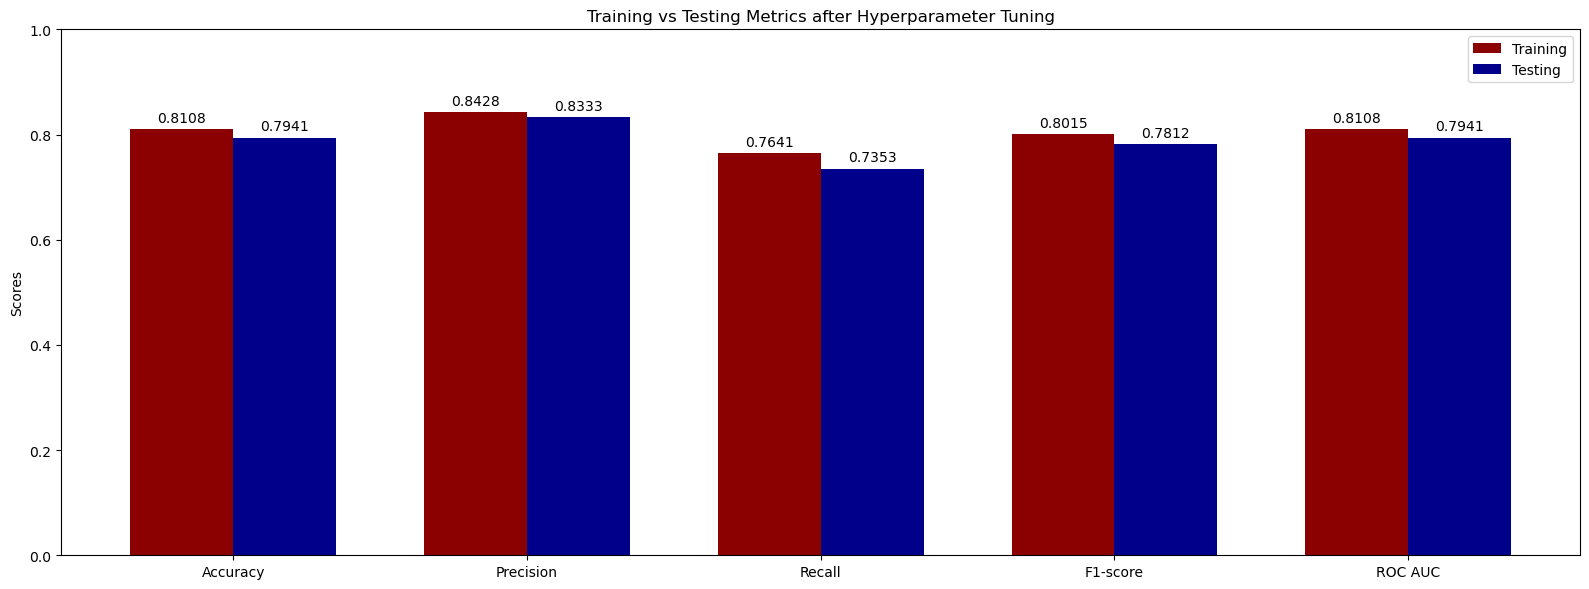

In [114]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
training_values_after_tuning = [training_accuracy, training_precision, training_recall, training_f1, training_roc_auc]
testing_values_after_tuning = [testing_accuracy, testing_precision, testing_recall, testing_f1, testing_roc_auc]

x = np.arange(len(metrics))  
width = 0.35  

fig, ax = plt.subplots(figsize=(16, 6))
rects1 = ax.bar(x - width/2, training_values_after_tuning, width, label='Training', color='darkred')
rects2 = ax.bar(x + width/2, testing_values_after_tuning, width, label='Testing', color='darkblue')

ax.set_ylim(0, 1.0)

ax.set_ylabel('Scores')
ax.set_title('Training vs Testing Metrics after Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [115]:
# Define the folder path where you want to save the model
folder_path = r'C:\Users\Acer NItro 5\titanic' 
# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Specify the file path including the folder path
file_path = os.path.join(folder_path, 'best_model.pickle')

# Open the file in binary write mode to save the model
with open(file_path, 'wb') as file:
    # Use pickle to dump (serialize) the trained model (best_model) into the file
    pickle.dump(best_model, file)

# END